
# 🏠 House Price Prediction — Advanced Regression Techniques

This project uses the **Kaggle House Prices dataset** to predict the sale prices of houses using **machine learning regression techniques**.

## 📌 Objective
Predict the **final price of a home** based on various features like lot size, neighborhood, year built, number of rooms, and more.

## 📊 Dataset
Source: [Kaggle — House Prices: Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

- **Train Data**: Includes features and the target variable (`SalePrice`).
- **Test Data**: Includes only features (no `SalePrice`), used for submission.
- **Features**: 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

## 🛠 Steps to Perform
1. **Load and Explore Data**
   - Import CSV files using `pandas`.
   - View dataset shape, info, and basic statistics.
   - Check for missing values.

2. **Data Cleaning**
   - Handle missing values (mean/median for numerical, mode for categorical).
   - Remove or replace outliers.
   - Encode categorical variables (`OneHotEncoder`, `LabelEncoder`).

3. **Feature Engineering**
   - Create new meaningful features.
   - Scale numerical values (`StandardScaler`, `MinMaxScaler`).

4. **Model Selection**
   - Try different regression models:
     - Linear Regression
     - Decision Tree Regressor
     - Random Forest Regressor
     - Gradient Boosting (XGBoost, LightGBM)
   - Perform **cross-validation**.

5. **Model Evaluation**
   - Metrics: RMSE (Root Mean Squared Error), R² Score.
   - Tune hyperparameters.

6. **Final Prediction & Submission**
   - Predict prices for the test dataset.
   - Save results in `.csv` format for Kaggle submission.

## 📦 Requirements
- Python 3.x
- Pandas, NumPy
- Matplotlib, Seaborn
- Scikit-learn
- XGBoost / LightGBM

## 🚀 Future Improvements
- Implement deep learning models (TensorFlow / PyTorch).
- Use advanced feature selection techniques.
- Try stacking and blending models.

## ✅ loading of data 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 



train_df=pd.read_csv('house-prices-advanced-regression-techniques/train.csv' )
test_df=pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
print(train_df.head(3))



   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]


In [2]:
print("the shape of the training dataset ",train_df.shape)
print("the shape of the test dataset ",test_df.shape)



the shape of the training dataset  (1460, 81)
the shape of the test dataset  (1459, 80)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
train_df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

## 🛠 data preprocessing and analysis  

#### 📊 statistical analysis 

In [5]:
train_df.drop("Id",axis=1,inplace=True)

In [6]:
train_df.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


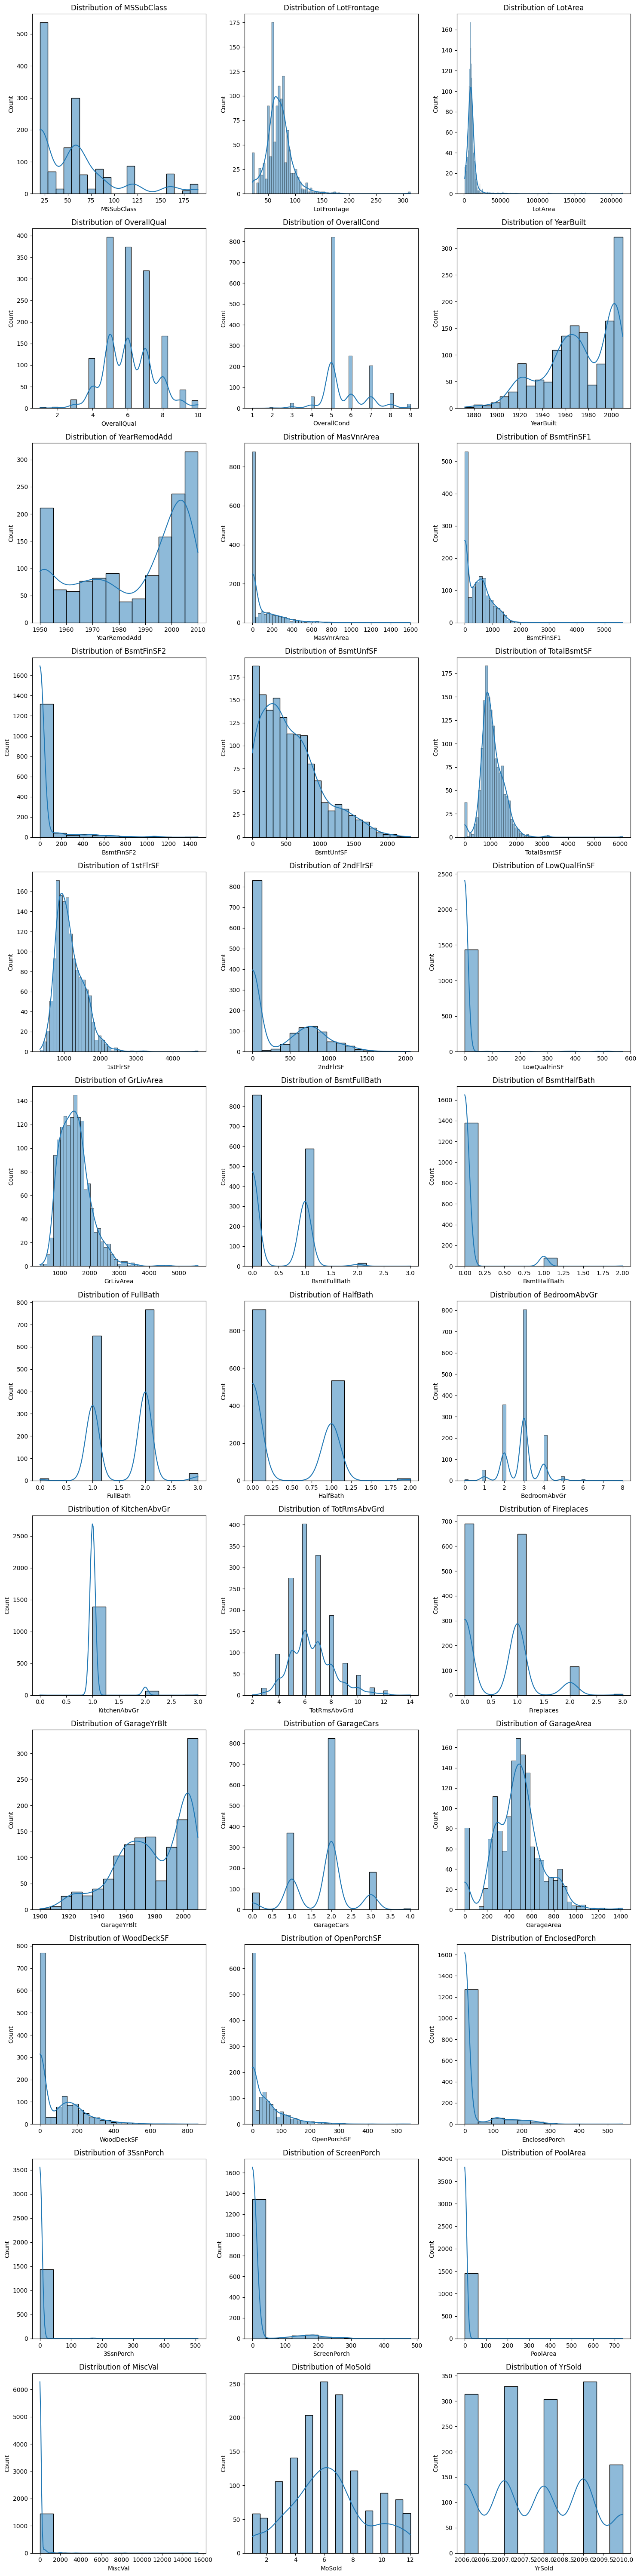

In [7]:
# Distribution Analysis

### extraction of numerical features
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove("SalePrice")

import matplotlib.pyplot as plt
import seaborn as sns

# Choose how many features per row
n_cols = 3  
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(train_df[col], kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



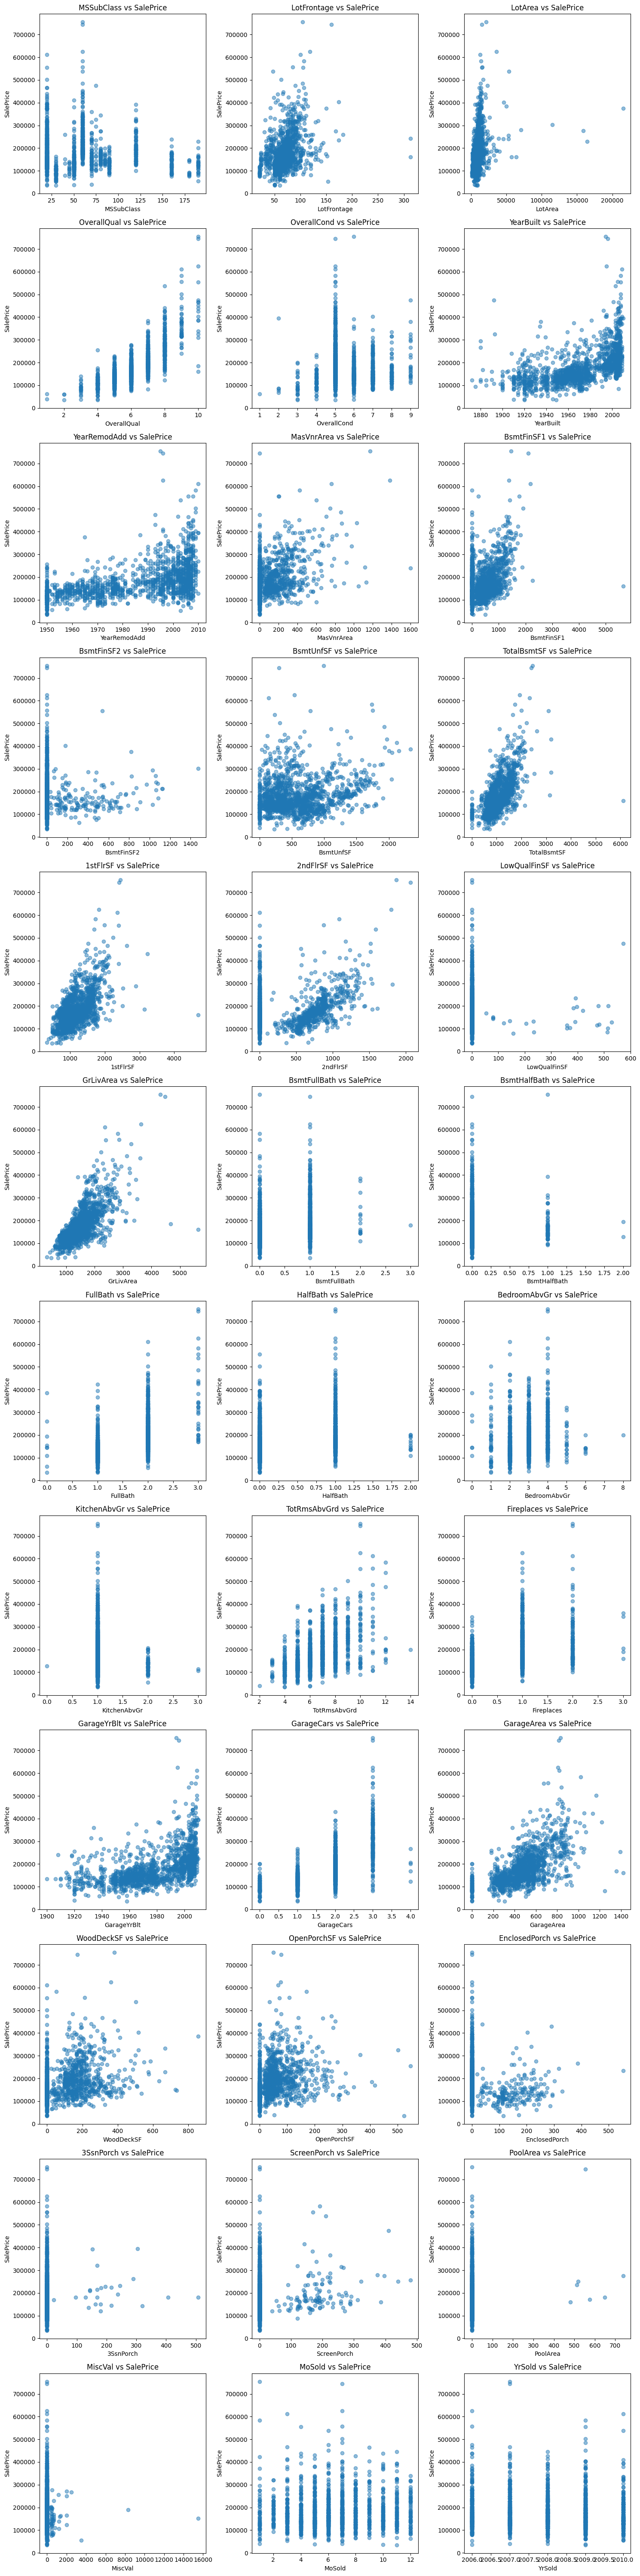

In [8]:
### visualization os the numerical values with the target 
n_cols = 3  
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.scatter(train_df[col], train_df["SalePrice"], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.show()




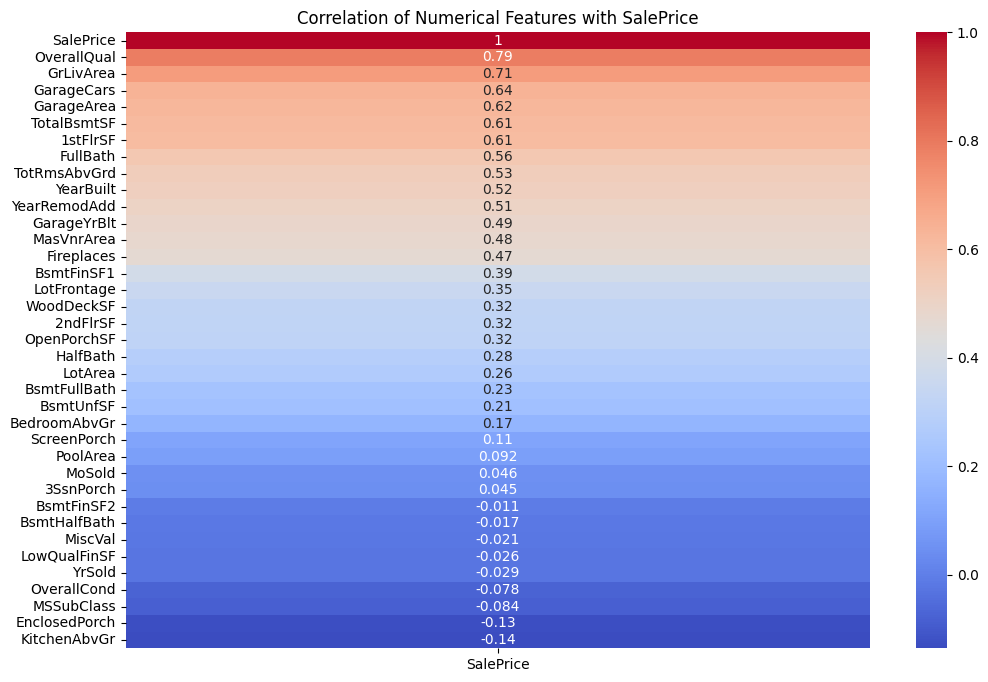

In [9]:
## Correlation Analysis for numerical features 

corr = train_df[numerical_features + ["SalePrice"]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr[["SalePrice"]].sort_values(by="SalePrice", ascending=False), 
            annot=True, cmap="coolwarm")
plt.title("Correlation of Numerical Features with SalePrice")
plt.show()


In [8]:
## analysis in categorical features 
## extraction of categorical features 
categorical_features = [
    col for col in train_df.columns 
    if col not in numerical_features and col != "SalePrice"
]
print(categorical_features )
for col in categorical_features:
    avg_feature=train_df.groupby(col)["SalePrice"].mean()
    print(f"average Sales Price for {col}  ")
    print(avg_feature)
    print("##########################")



['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
average Sales Price for MSZoning  
MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64
##########################
average Sales Price for Street  
Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64
##########################
average Sales Price for Alley  
Alley
Grvl    122

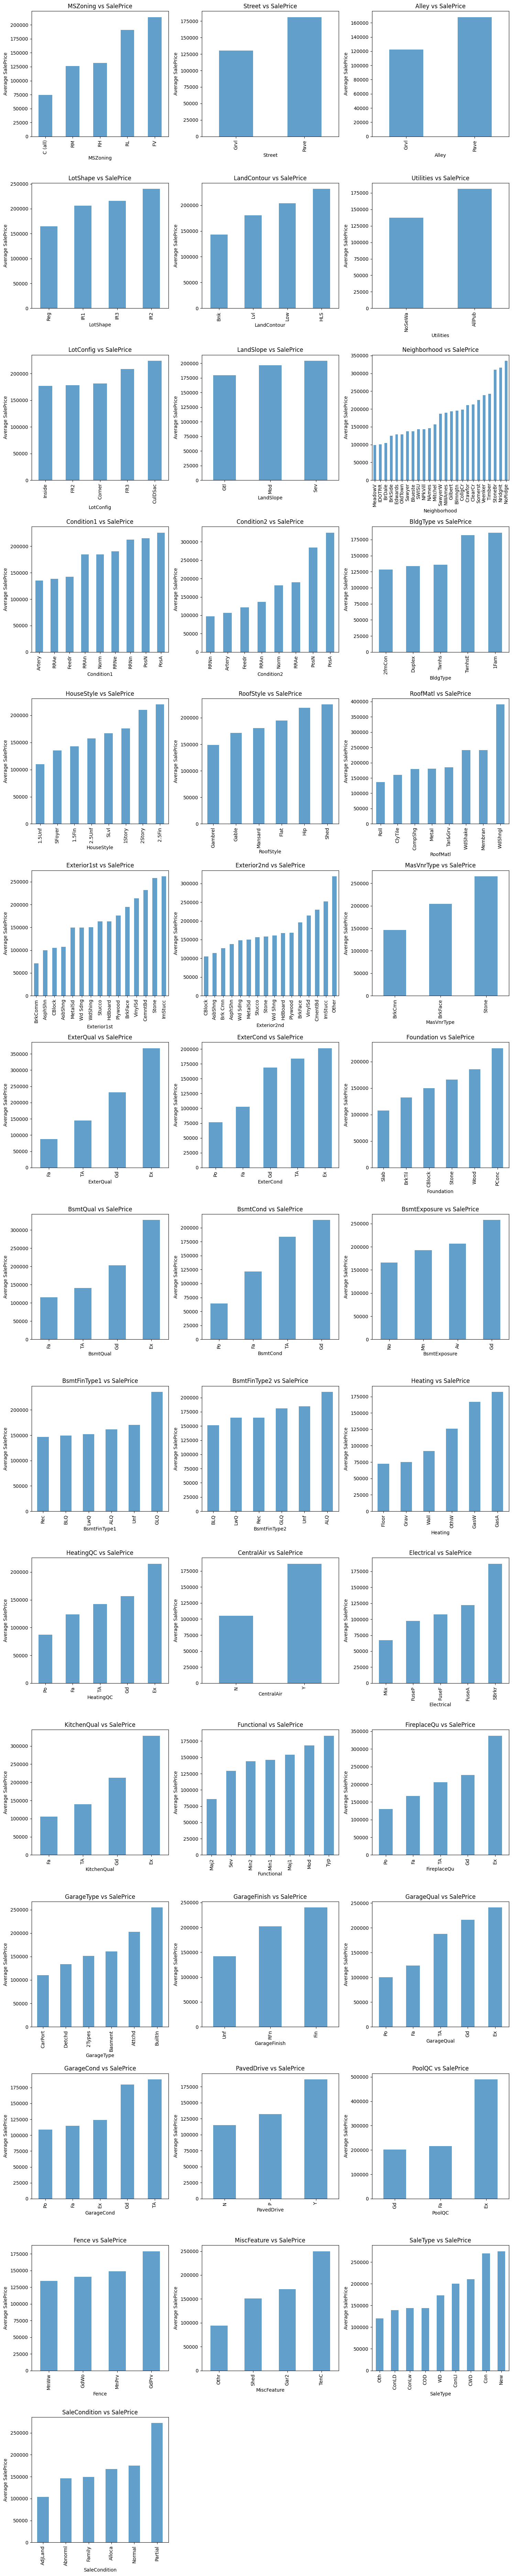

In [9]:
#n_cols = 3  
n_rows = (len(categorical_features) + n_cols - 1) // n_cols  

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    
    
    avg_price = train_df.groupby(col)["SalePrice"].mean().sort_values()
    

    avg_price.plot(kind="bar", alpha=0.7)
    
    plt.xlabel(col)
    plt.ylabel("Average SalePrice")
    plt.title(f"{col} vs SalePrice")

plt.tight_layout()
plt.show()

#### 🔹 feature engineering

In [10]:
## concatenate the test and train for preprocessing 
target = train_df['SalePrice']
target_log = np.log1p(train_df['SalePrice'])
test_df=test_df.drop("Id",axis=1)
train_pre=train_df.drop("SalePrice",axis=1)
preprocessing_data=pd.concat([train_pre,test_df])
cat_data = preprocessing_data.loc[:, categorical_features]
print("Categorical data shape:", cat_data.shape)
num_features = [col for col in numerical_features if col != "SalePrice"]

num_data = preprocessing_data.loc[:, num_features]
print("Numerical data shape:", num_data.shape)




Categorical data shape: (2919, 43)
Numerical data shape: (2919, 36)


In [11]:
## handling missing values in numerical data 
### measuring of skew
from scipy.stats import skew
#.apply() --> will move column wise (apply the function for each col)
data_num_skew = num_data.apply(lambda x: skew(x.dropna()))

data_num_skew = data_num_skew[data_num_skew > .75]

# apply log + 1 transformation for all numeric features with skewness over .75
num_data[data_num_skew.index] = np.log1p(num_data[data_num_skew.index])

## handling missing values 

## the steps we will take is that we will drop 
##tha none for small missing values but is the missing values is very 
## large we will not able to remove it as the size of data will decrease 


for col in numerical_features:
    ## get teh number of missing values 
    num_of_nulls = num_data[col].isnull().sum()

    ## check whether the number of nulls is smaller than 50 
    if num_of_nulls < 50:
        # Drop rows with NaN for this column
        num_data = num_data.dropna(subset=[col])
    else:
        # Fill missing values with mean
        num_data[col] = num_data[col].fillna(num_data[col].mean())



In [12]:
## handling missing  values in the categorical data 
## the method that we will move with is that if the number of missing values greater than 50 we will 
## remove it otherwise we will fill it with word missing


for col in categorical_features:
    ## get teh number of missing values 
    num_of_nulls = cat_data[col].isnull().sum()

    ## check whether the number of nulls is smaller than 50 
    if num_of_nulls < 50:
        # Drop rows with NaN for this column
        cat_data = cat_data.dropna(subset=[col])
    else:
        # Fill missing values with mean
        cat_data[col]=cat_data[col].fillna("Missing")
        
        




In [13]:
## dropping the duplicates in the data 
print(f"Categorical data size: {cat_data.shape}")
print(f"Numerical data size: {num_data.shape}")
print(f"the number of duplicate data in the numerical features: {cat_data.duplicated().sum()}")
print(f"the number of duplicate data in the Categorical features: {num_data.duplicated().sum()}")
cat_data=cat_data.drop_duplicates()
num_data=num_data.drop_duplicates()

print(f"Categorical data size after removing duplicates: {cat_data.shape}")
print(f"Numerical data size after removing duplicates: {num_data.shape}")

Categorical data size: (2909, 43)
Numerical data size: (2893, 36)
the number of duplicate data in the numerical features: 64
the number of duplicate data in the Categorical features: 5
Categorical data size after removing duplicates: (2845, 43)
Numerical data size after removing duplicates: (2888, 36)


In [14]:
## preprocessing of the no numerical features and make it numeric for the computer to understand 
### one hot encoding for non-ordered   features and label encoding for ordered data 
from sklearn.preprocessing import OrdinalEncoder


# ---- Ordinal Features ----
ordinal_features = {
    "ExterQual": [ "Po", "Fa", "TA", "Gd", "Ex"],
    "ExterCond": [ "Po", "Fa", "TA", "Gd", "Ex"],
    "BsmtQual": [ "NA", "Po", "Fa", "TA", "Gd", "Ex"],  
    "BsmtCond": ["NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "HeatingQC": [ "Po", "Fa", "TA", "Gd", "Ex"],
    "KitchenQual": [ "Po", "Fa", "TA", "Gd", "Ex"],
    "FireplaceQu": [ "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageQual": [ "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "GarageCond": [ "NA", "Po", "Fa", "TA", "Gd", "Ex"],
    "PoolQC": [ "NA", "Fa", "TA", "Gd", "Ex"],
    "BsmtExposure": [ "NA", "No", "Mn", "Av", "Gd"],
    "BsmtFinType1": [ "NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "BsmtFinType2": ["NA", "Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"],
    "Functional": [ "Sal", "Sev", "Maj2", "Maj1", "Mod", "Min2", "Min1", "Typ"],
    "GarageFinish": [ "NA", "Unf", "RFn", "Fin"],
    "Fence": ["NA", "MnWw", "GdWo", "MnPrv", "GdPrv"],
    "LotShape": [ "IR3", "IR2", "IR1", "Reg"],
    "Utilities": [ "ELO", "NoSeWa", "NoSewr", "AllPub"]
}

# ---- Nominal Features ----
nominal_features = [col for col in cat_data.columns if col not in ordinal_features]

# ---- Encode Ordinal ----
for col, categories in ordinal_features.items():
    # Ensure we are working with string values
    cat_data[col] = cat_data[col].astype(str)

    # Check if column already numeric (encoded earlier)
 
    encoder = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=-1)
    cat_data[col] = encoder.fit_transform(cat_data[[col]])
    
print(cat_data.shape)


nominal_dummies = pd.get_dummies(cat_data[nominal_features], drop_first=True)

cat_data = pd.concat([cat_data.drop(columns=nominal_features), nominal_dummies], axis=1)

print("Final categorical shape:", cat_data.shape)


(2845, 43)
Final categorical shape: (2845, 168)


In [15]:
common_index = num_data.index.intersection(cat_data.index)

num_data = num_data.loc[common_index]
cat_data = cat_data.loc[common_index]


num_data = num_data.reset_index(drop=True)
cat_data = cat_data.reset_index(drop=True)



final_df = pd.concat([num_data, cat_data], axis=1)

feature_df_pre=final_df.loc[:len(train_df)-1]
train_df_pre=pd.concat([target_log,feature_df_pre],axis=1)

print(train_df_pre.shape)




(1460, 205)


In [16]:
## splitting the data into train test 

from sklearn.model_selection import train_test_split
X=feature_df_pre
Y=target_log
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)



In [17]:
from sklearn.linear_model import LinearRegression
## creating the model 
model =LinearRegression()
## fitting the data into the created model
model.fit(X_train,y_train)



LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R²:", r2)


RMSE: 0.4715874549530422
R²: -0.1917557982550646


C:\Users\shahd\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
model.score(X_test,y_test)

-0.1917557982550646